<a href="https://colab.research.google.com/github/deepu718/tensorflow_practice/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Intrroduction to Regression with Neural Networks in Tensorflow

There are many definations for a regression problem but in our case , we're going to simplify it: predicting numerical variable based on some other combination of variables, even shorter... predicting a number.

In [101]:
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating some data to view and fit

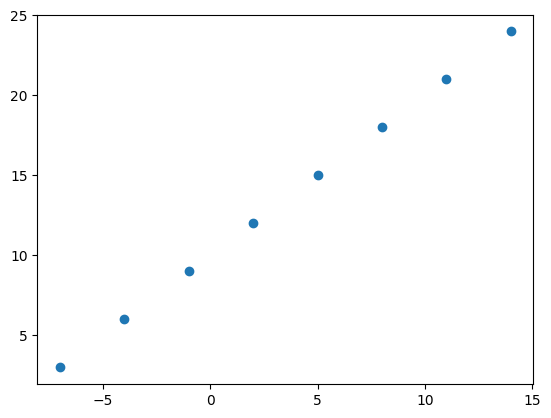

In [102]:
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# visualize it
plt.scatter(X,y);

In [103]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input ans output shape

In [104]:
# create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [105]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [106]:
# Turn our numpy arrays into tesnors
X = tf.cast(tf.constant(X),dtype=tf.float32)
y = tf.cast(tf.constant(y),dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

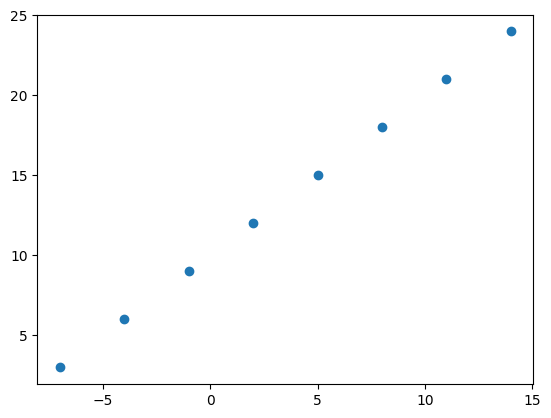

In [107]:
plt.scatter(X,y);

## Steps in modeling with Tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer ( tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3.**Fitting a model** - letting the model try to find patterns between X & y (features and model).

In [108]:
# Set random seed
tf.random.set_seed(42)

# 1. create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
''' or model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))'''

# 2. Compile the model
model.compile(loss=tf.keras.losses.MAE,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 467ms/step - loss: 8.0964 - mae: 8.0964
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 7.9639 - mae: 7.9639
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 7.8314 - mae: 7.8314
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 7.6989 - mae: 7.6989
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 7.5664 - mae: 7.5664


In [109]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [110]:
# Try and make a prediction  using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 87ms/step


array([[29.271027]], dtype=float32)

### Improving our model
we can improve our model by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation of each layer.
2. **Compiling a model** - here we might change the functions or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [111]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 451ms/step - loss: 8.8080 - mae: 8.8080
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 8.6755 - mae: 8.6755
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 8.5430 - mae: 8.5430
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 8.4105 - mae: 8.4105
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 8.2780 - mae: 8.2780
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 8.1455 - mae: 8.1455
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 8.0130 - mae: 8.0130
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 7.8805 - mae: 7.8805
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 7.7480 - mae: 7.7480
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 7.6155 - mae: 7.6155
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - lo

In [112]:
# Let's see iff our model predction has improved...
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 125ms/step


array([[30.112064]], dtype=float32)

In [113]:
# Let see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 590ms/step - loss: 16.2459 - mae: 16.2459
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 16.1416 - mae: 16.1416
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 16.0374 - mae: 16.0374
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 15.9333 - mae: 15.9333
Epoch 5/100
1/1 [==============================] - 0s 31ms/step - loss: 15.8294 - mae: 15.8294
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 15.7256 - mae: 15.7256
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 15.6219 - mae: 15.6219
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 15.5184 - mae: 15.5184
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 15.4150 - mae: 15.4150
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 15.3117 - mae: 15.3117
Epoch 11/100
1/1 [==============================] - 0s 

In [114]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 76ms/step


array([[19.294502]], dtype=float32)

### Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth(the orignal label)

In [115]:
# make a bigger a dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [116]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

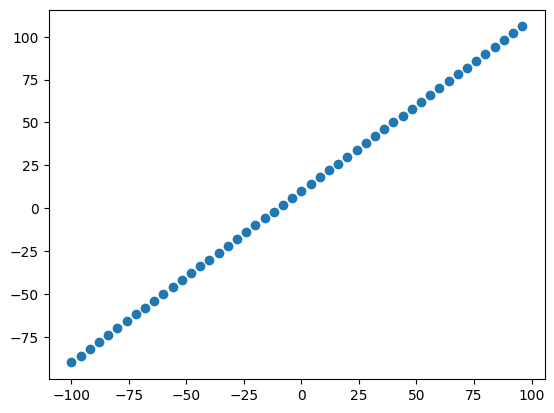

In [117]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X,y)

### The 3 sets...

* Training set - the model learns from the data, which is typiclly 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [118]:
# Check the length of how many samples we have
len(X)

50

In [119]:
# Split the data into train and test sets
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

### Visualising the data

Now we've got our data in training and test sets... let's visualize it again!

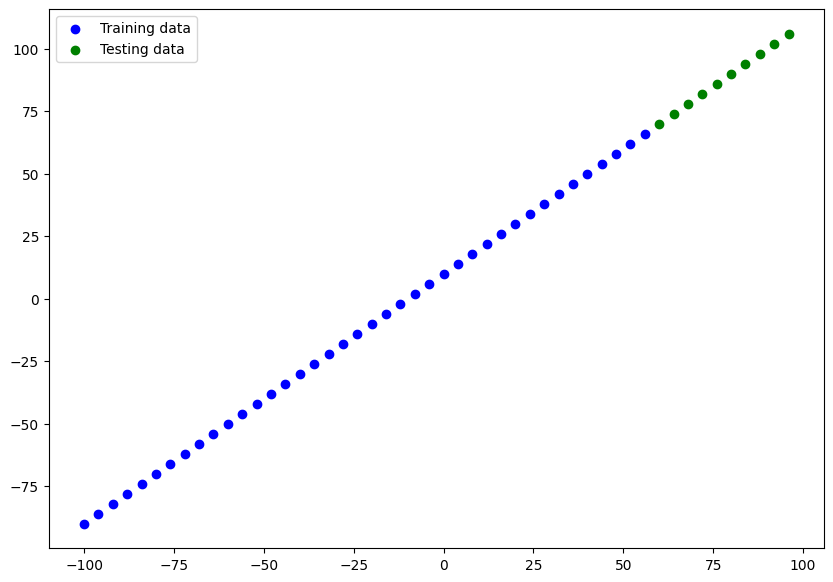

In [120]:
plt.figure(figsize=(10,7))
#Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend();

In [121]:
# Let's have a look at how to build neural network for our data

# 1. create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. Fit the model
# model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

### Visualising the model

In [122]:
model.summary()

ValueError: ignored

In [148]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1, name='output_layer')
],name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [149]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params -these parameters are not updated during training (this is typical when you bring in already lear patterns or prameters from other models during transfer leaning.

In [150]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100, verbose=0)

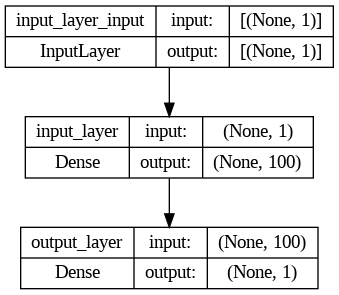

In [151]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

### Visualising our model prediction

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or  `y_true` versus `y_pred` (ground truth versus your model's predictions)

In [152]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 56ms/step


array([[ 78.35569 ],
       [ 83.46047 ],
       [ 88.56526 ],
       [ 93.670044],
       [ 98.77483 ],
       [103.87961 ],
       [108.984406],
       [114.08918 ],
       [119.19397 ],
       [124.29876 ]], dtype=float32)

In [153]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [154]:
# Let's create a plotting function
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=y_pred):
  """
  Plots training data, test data and compress predictions to ground truth labels
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data,test_labels,c="g",label="Testing data")
  # Plot model's prediction in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

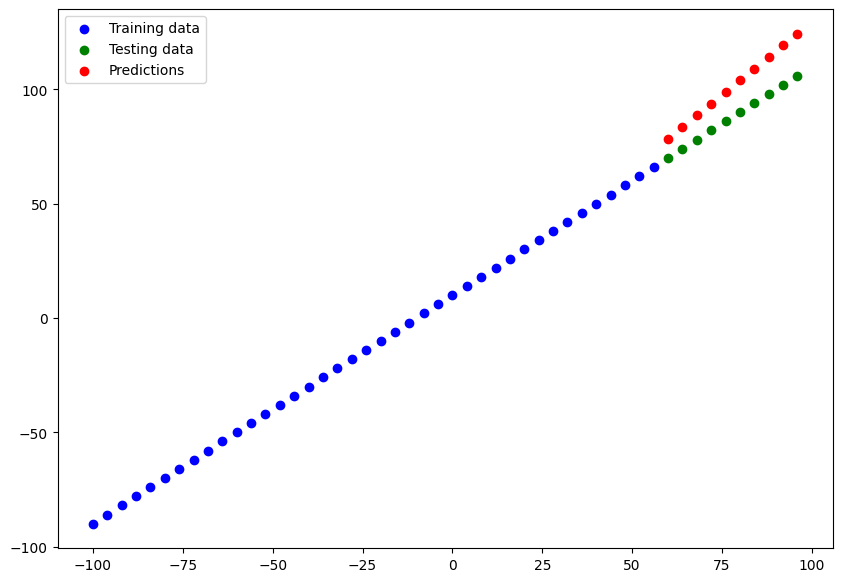

In [155]:
plot_prediction()

### Evaluating our models predictions with evaluation metrics

Depending on the problem you're working on, there will be different evaluations metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [156]:
# Evaluate the model on test set
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 116ms/step - loss: 13.3272 - mae: 13.3272


[13.327221870422363, 13.327221870422363]

In [157]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test,y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([12.257724, 10.507906, 10.      , 10.734009, 12.864901, 16.303686,
       20.984406, 26.089178, 31.19397 , 36.29876 ], dtype=float32)>

In [158]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [159]:
tf.squeeze(y_pred) # since test and pred were not of same shape(pred having extra dim)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 78.35569 ,  83.46047 ,  88.56526 ,  93.670044,  98.77483 ,
       103.87961 , 108.984406, 114.08918 , 119.19397 , 124.29876 ],
      dtype=float32)>

In [160]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=13.327222>

In [161]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=187.6844>

In [170]:
# make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_test,

                                        y_pred=tf.squeeze(y_pred))
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between feature and labels)
2. Make your model larger (using a more a complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the orignal model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layer, trained for 100 epochs
3. `model_3` - 2 layer, trained for 500 epochs

**Build model_1**

In [174]:
tf.random.set_seed(42)

# craete the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Fit the model
model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=0)

1/1 [==============================] - 0s 48ms/step


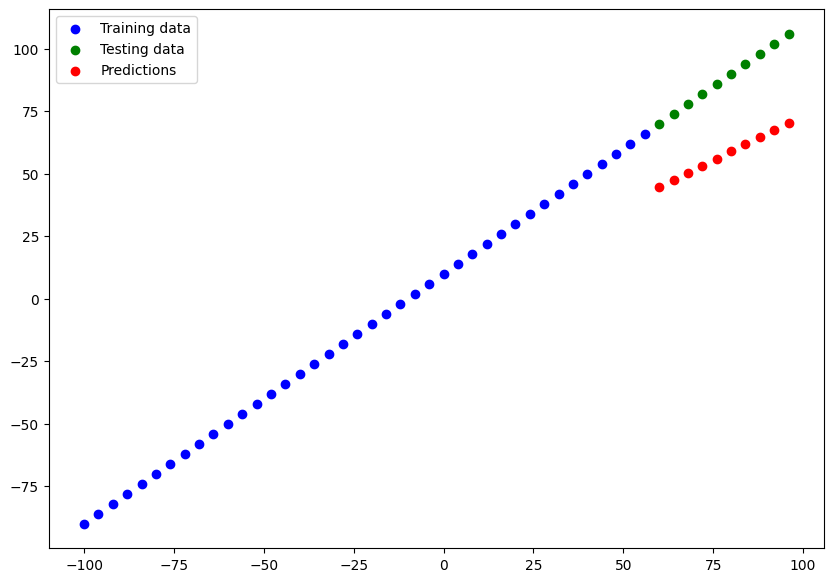

In [175]:
# Make and plot prediction for model_1
y_preds_1 = model_1.predict(tf.expand_dims(X_test,axis=-1))
plot_prediction(predictions=y_preds_1)

In [176]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, tf.squeeze(y_preds_1))
mse_1 = mse(y_test, tf.squeeze(y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.51592>,
 <tf.Tensor: shape=(), dtype=float32, numpy=941.56525>)

**Build `model_2`**

* 2 dense layer,trained for 100 epochs

In [179]:
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])
# Fit the model
model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=0)

1/1 [==============================] - 0s 82ms/step


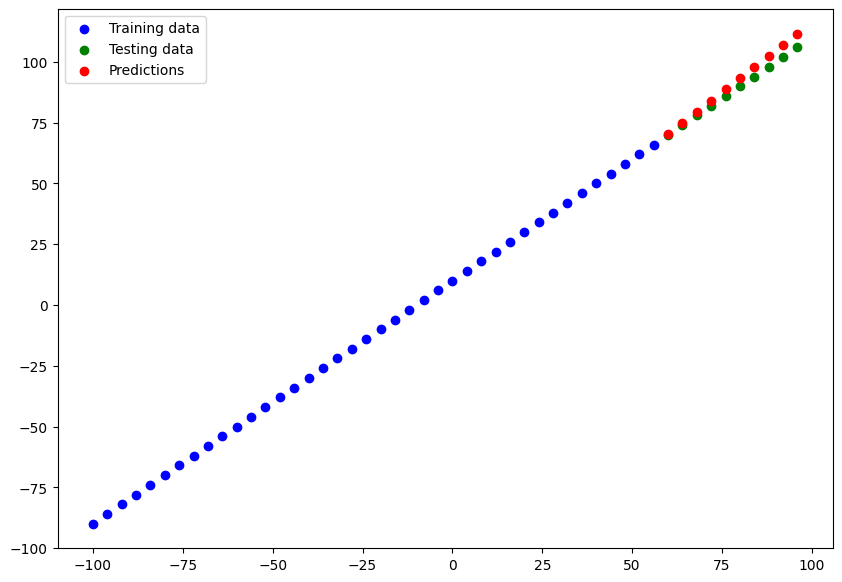

In [180]:
# Make and plot predictions
y_preds_2 = model_2.predict(tf.expand_dims(X_test,axis=-1))
plot_prediction(predictions=y_preds_2)

In [181]:
# Calculate model_2 evaluations metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.9889686>,
 <tf.Tensor: shape=(), dtype=float32, numpy=11.692839>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [183]:
tf.random.set_seed(42)

# create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# Fit the model
model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500,verbose=0)

1/1 [==============================] - 0s 272ms/step


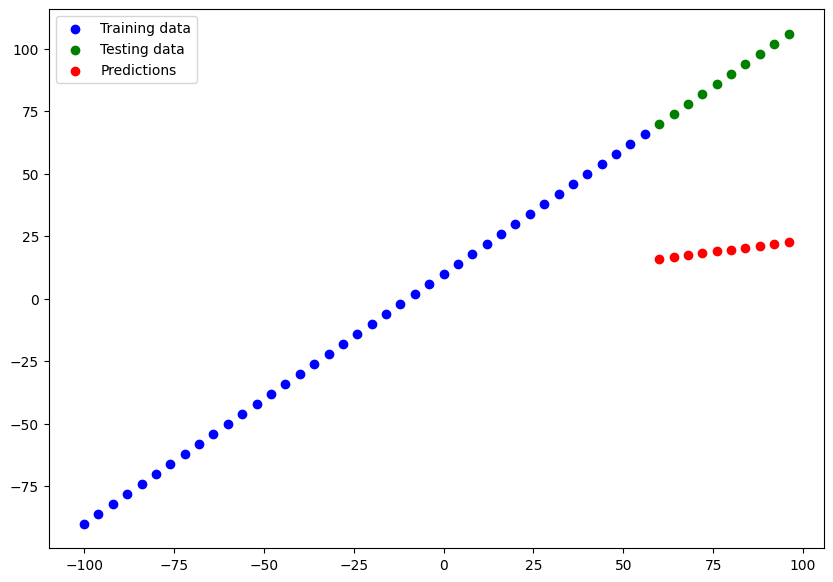

In [184]:
# Make and plot predictions
y_preds_3 = model_3.predict(tf.expand_dims(X_test,axis=-1))
plot_prediction(predictions=y_preds_3)

In [185]:
# Calculate model_2 evaluations metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.69299>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4805.289>)

### Comparing the results of our experiments

We've run few experiments let's compare the results

In [188]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],
                 ["model_2",mae_2.numpy(),mse_2.numpy()],
                 ["model_3",mae_3.numpy(),mse_3.numpy()]]
all_results = pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,30.515921,941.565247
1,model_2,2.988969,11.692839
2,model_3,68.692993,4805.289062


Looks like `model_2` perform the best

In [189]:
model_2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### Tracking your experiments

one really good habit in machine learning modeling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

* TensorBoard - a component of the tensorflow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models

Saving our model allows us to use them outside of Google colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:
1. The SaveModel Format
2. The HDF5 Format

In [191]:
# Save model using 1.
model_2.save("best_model_SaveModel_format")

In [192]:
# save model in HDF5 format
model_2.save("best_model_HDF5_format.h5")

### Loading in a saved model


In [193]:
# Load in the savemodel format model
loaded_savemodel_format = tf.keras.models.load_model('best_model_SaveModel_format')
loaded_savemodel_format.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [194]:
# Compare model_2 predictions with savemodel format model predictions
model_2_preds = model_2.predict(tf.expand_dims(X_test,axis=-1))
loaded_savemodel_format_preds = loaded_savemodel_format.predict(tf.expand_dims(X_test,axis=-1))
model_2_preds == loaded_savemodel_format_preds

1/1 [==============================] - 0s 82ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [195]:
# Load in the h5 format model
loaded_h5_format = tf.keras.models.load_model('best_model_HDF5_format.h5')
loaded_h5_format.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [196]:
# Compare model_2 predictions with h5 format model predictions
model_2_preds = model_2.predict(tf.expand_dims(X_test,axis=-1))
loaded_h5_format_preds = loaded_h5_format.predict(tf.expand_dims(X_test,axis=-1))
model_2_preds == loaded_h5_format_preds

1/1 [==============================] - 0s 49ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])